# IS-02 Machine Learning - Data and Web Science
## Lecture 3: Decision Trees
## Project 2 - Random Forest
### <i>Avgitidis Konstantinos AM: 65</i>

In [1]:
# Importing all necessary libraries
from sklearn import datasets, metrics, ensemble, model_selection
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
breastCancer = datasets.load_breast_cancer(as_frame=True) #Load the breast cancer Dataset

In [3]:
breast_df = breastCancer.data.values[:,9:18] #Get just 8 columns in order to avoid overfitting
target_df = breastCancer.target

In [4]:
#Creating our DataFrame of Random Forest models
#We really dont want to be creating the model each time so lets pickle it
import pickle
amodel = []
criterions = ['gini','entropy']
try:
    models = pickle.load( open( "random_forest.p", "rb" ) )
except Exception:
    #Initialise the DataFrame we're going to be using
    columns = ['Algorithm','Estimators','Criterion','accuracy_score','precision_score','recall_score','f1_score','accuracy_score_train','precision_score_train','recall_score_train','f1_score_train']
    models = pd.DataFrame(columns=columns) 
    for i in range(200):
        estimators = i+1
        criterion = random.choice(criterions)
        amodel.append('Random Forest')
        amodel.append(estimators)
        amodel.append(criterion)
        model = ensemble.RandomForestClassifier(n_estimators=estimators,criterion=criterion)
        x_train, x_test, y_train, y_test = model_selection.train_test_split(breast_df, target_df,random_state=0)
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        y_predicted_train = model.predict(x_train)
        amodel.append(metrics.accuracy_score(y_test, y_predicted))
        amodel.append(metrics.precision_score(y_test, y_predicted))
        amodel.append(metrics.recall_score(y_test, y_predicted))
        amodel.append(metrics.f1_score(y_test, y_predicted))
        amodel.append(metrics.accuracy_score(y_train, y_predicted_train))
        amodel.append(metrics.precision_score(y_train, y_predicted_train))
        amodel.append(metrics.recall_score(y_train, y_predicted_train))
        amodel.append(metrics.f1_score(y_train, y_predicted_train))
        models = models.append(pd.DataFrame([amodel], columns=columns))
        amodel.clear()
    models.reset_index(drop=True)
    pickle.dump(models, open( "random_forest.p", "wb" ) )


In [5]:
from pandas import ExcelWriter
with ExcelWriter(path="DecisionTrees.xlsx",engine='openpyxl',mode='a') as xl_writer:
    models.to_excel(excel_writer=xl_writer,sheet_name='Random Forest',index=False,         float_format="%.6f",freeze_panes=(1,0)) #Saving to our previous excel file

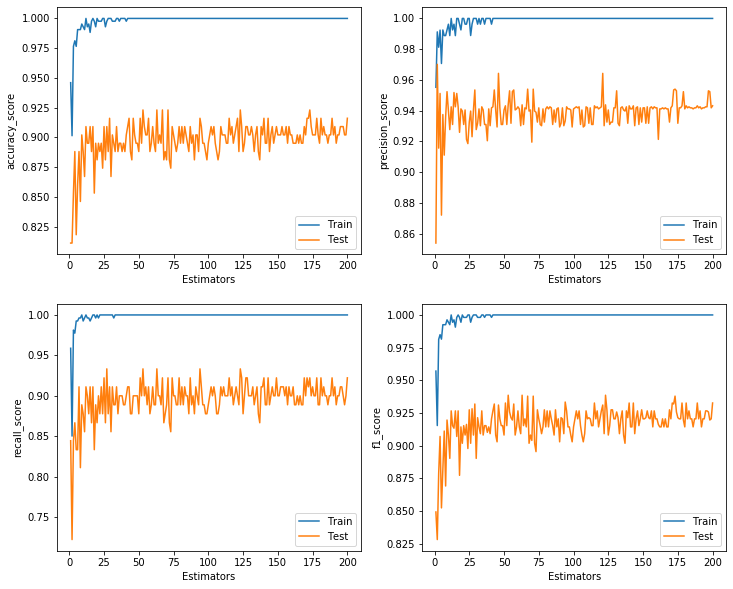

In [6]:
#Plotting the figures requested
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
sns.lineplot(x='Estimators',y='recall_score_train',data=models,ax=axs[1][0])
sns.lineplot(x='Estimators',y='recall_score',data=models,ax=axs[1][0])
sns.lineplot(x='Estimators',y='f1_score_train',data=models,ax=axs[1][1])
sns.lineplot(x='Estimators',y='f1_score',data=models,ax=axs[1][1])
sns.lineplot(x='Estimators',y='precision_score_train',data=models,ax=axs[0][1])
sns.lineplot(x='Estimators',y='precision_score',data=models,ax=axs[0][1])
sns.lineplot(x='Estimators',y='accuracy_score_train',data=models,ax=axs[0][0])
sns.lineplot(x='Estimators',y='accuracy_score',data=models,ax=axs[0][0])
for i in list(itertools.product(*["01"] * 2)):
    axs[int(i[0])][int(i[1])].legend(['Train','Test'])

In [7]:
fig.savefig('RandomForestMetrics.png') #Saving the figures into a local file